# <center>Exploratory Data Analysis: Mental Health Surveys (2016-2019)<center>

<center>Welcome to the exploratory data analysis (EDA) of mental health surveys conducted between the years 2016 and 2019.<center>

## <center>Introduction<center>

The primary objectives of this analysis are to explore trends in attention to mental health and openness in sharing personal mental health disorders over the specified time period. The secondary objective of this analysis is to showcase the proficient use of SQL. To achieve our primary objective, we aim to answer the following key question:<br>

* **Is there a trend indicating increased openness in sharing about personal mental health disorders?**<br>





## <center>Used Libraries<center>

First, we need to install all the required packages to run this notebook. To do that, just run the cell below. If the need arises, the required packages list can be modified in the requirements.txt file.

In [1]:
%%capture
%pip install -r requirements.txt

In this analysis, we employ three types of libraries. sqlite3 and Pandas serve for data manipulations, while Matplotlib and Seaborn are utilized for plotting. The Warnings library is solely employed to suppress non-meaningful warning messages.

In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import queries as q
from utilities import database_utils as dbu


## <center>Load datasets<center>

For this analysis we are using **Mental Health in the Tech Industry** dataset  that can be found on [Kaggle](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry).

In [4]:
pd.set_option('mode.chained_assignment', None)
conn = dbu.create_connection()
cursor = conn.cursor()

First, we connect to the database file and create a cursor object for executing SQL queries.

In [5]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

dataframes = {}

for table_name in tables['name']:
    query = f"SELECT * FROM {table_name};"
    dataframes[table_name] = pd.read_sql_query(query, conn)


Next, we fill our dataframe with data from our database and check if it's represented correctly.

In [6]:
dataframes["Question"].set_index("questionid", inplace = True)
dataframes["Question"].head()

,questiontext
questionid,
1,What is your age?
2,What is your gender?
3,What country do you live in?
4,"If you live in the United States, which state ..."
5,Are you self-employed?


In [7]:
dataframes["Answer"].set_index("UserID", inplace = True)
dataframes["Answer"].head()

,AnswerText,SurveyID,QuestionID
UserID,,,
1,37,2014,1
2,44,2014,1
3,32,2014,1
4,31,2014,1
5,31,2014,1


In [8]:
dataframes["Survey"].set_index("SurveyID", inplace = True)
dataframes["Survey"].head()

,Description
SurveyID,
2014,mental health survey for 2014
2016,mental health survey for 2016
2017,mental health survey for 2017
2018,mental health survey for 2018
2019,mental health survey for 2019


Now that we know that our data is read correctly, we can start our data cleaning and analysis. First things first, we need to filter out data that can help us to answer primary questions. Because the objective is to look for trends and patterns over time, the first thing we need to do is to filter out questions that can prove useful to us and span for multiple years.

In [9]:
spaning_questions_df = q.spaning_questions_query()
spaning_questions_df

,QuestionID
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


As we can see, only the first 12 questions from 118 are found in all the surveys. Even though after closer inspection of the question dataframe, we can see that some questions are just rephrasings of earlier ones, but still, 12 starting questions aren't enough. Let's try removing surveys and see if there are any positive changes.

In [10]:
spaning_questions_first_survey_excluded_df = q.spaning_questions_first_exclusion()
spaning_questions_first_survey_excluded_df.shape

(43, 1)

Just by removing the first survey, we can see a huge improvement because the rest of the four surveys share 43 questions.

In [11]:
pd.set_option('display.max_colwidth', None)
spaning_questions_first_survey_excluded_df

,questiontext
0,What is your age?
1,What is your gender?
2,What country do you live in?
3,"If you live in the United States, which state or territory do you live in?"
4,Are you self-employed?
5,Do you have a family history of mental illness?
6,Have you ever sought treatment for a mental health disorder from a mental health professional?
7,How many employees does your company or organization have?
8,Is your employer primarily a tech company/organization?
9,Does your employer provide mental health benefits as part of healthcare coverage?


Now that we have our questions chosen, we can construct our dataframe made of all tables in the database.

In [12]:
final_df = q.final_dataframe_query()
final_df

,UserID,QuestionID,questiontext,SurveyID,AnswerText
0,1261,1,What is your age?,2016,39
1,1262,1,What is your age?,2016,29
2,1263,1,What is your age?,2016,38
3,1264,1,What is your age?,2016,43
4,1265,1,What is your age?,2016,43
...,...,...,...,...,...
124231,4214,56,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,2019,"yes, i observed"
124232,4215,56,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,2019,"yes, i observed"
124233,4216,56,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,2019,i've always been self-employed
124234,4217,56,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,2019,maybe/not sure


In [13]:
final_df.isnull().sum()

UserID          0
QuestionID      0
questiontext    0
SurveyID        0
AnswerText      0
dtype: int64

In [14]:
final_df.duplicated().sum()

0

In [15]:
final_df["UserID"].duplicated().sum()

121278

Here we can see that even though our dataset as a whole doesn't have any duplicated values, the UserID column values do duplicate, which implies that some people answered multiple years in a row.

In [16]:
final_df.dtypes

UserID           int64
QuestionID       int64
questiontext    object
SurveyID         int64
AnswerText      object
dtype: object

## <center> Exploratory Data analysis <center>

Let's start exploring the data by getting to know basic information about survey correspondents. First, let's check age and gender distributions of all correspondents.

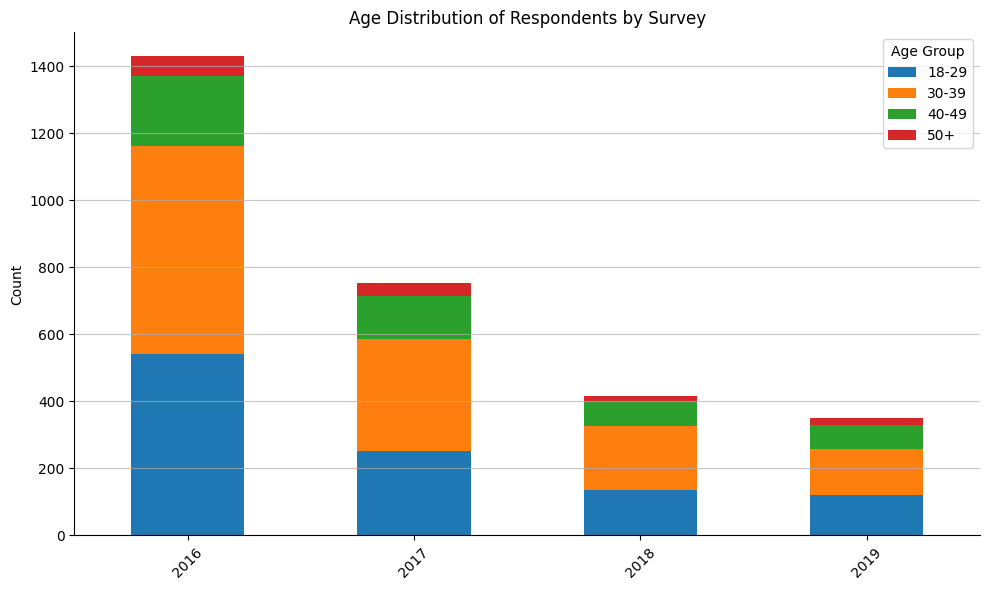

In [17]:
final_df['AnswerText'] = pd.to_numeric(final_df['AnswerText'], errors='coerce')
filtered_df = final_df[(final_df['AnswerText'] >= 18) & (final_df['AnswerText'] <= 99)]

bins = [18, 30, 40, 50, 100]
labels = ['18-29', '30-39', '40-49', '50+']
filtered_df.loc[:, 'AgeGroup'] = pd.cut(filtered_df['AnswerText'], bins=bins, labels=labels)

grouped_by_age = filtered_df.groupby(['SurveyID', 'AgeGroup']).size().unstack(fill_value=0)

grouped_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Distribution of Respondents by Survey')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(axis='y', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


In [18]:
final_df.isnull().sum()

UserID              0
QuestionID          0
questiontext        0
SurveyID            0
AnswerText      79847
dtype: int64

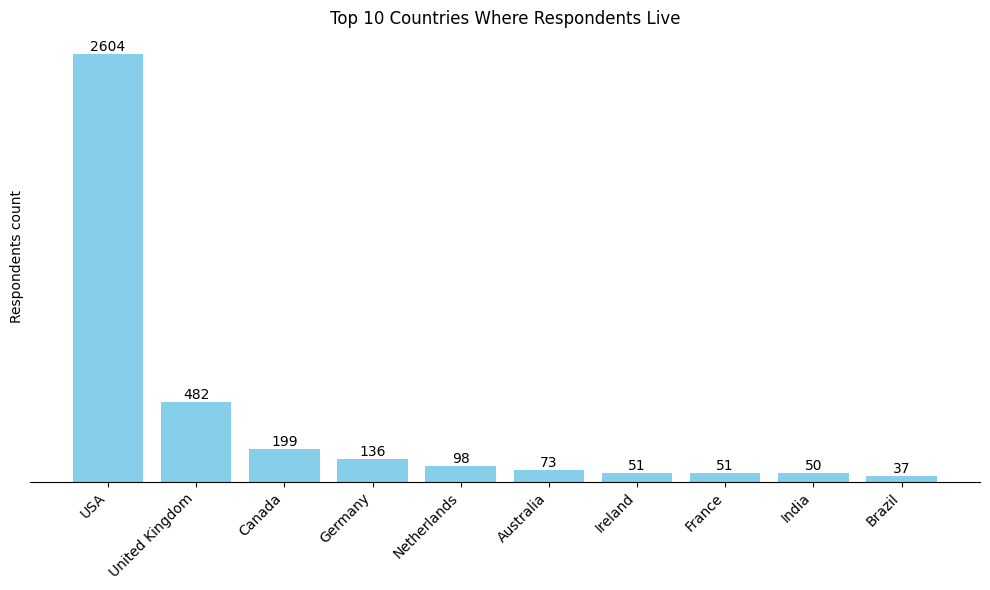

In [19]:
country_of_resedancy_query = q.country_of_resedancy_query()

plt.figure(figsize=(10, 6))
bars = plt.bar(country_of_resedancy_query['CleanedAnswer'], country_of_resedancy_query['Count'], color='skyblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom')

plt.title('Top 10 Countries Where Respondents Live')
plt.xlabel('')
plt.ylabel('Respondents count')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.gca().spines['left'].set_visible(False)
plt.gca().yaxis.set_ticks([])
plt.grid(False)
plt.tight_layout()
plt.show()


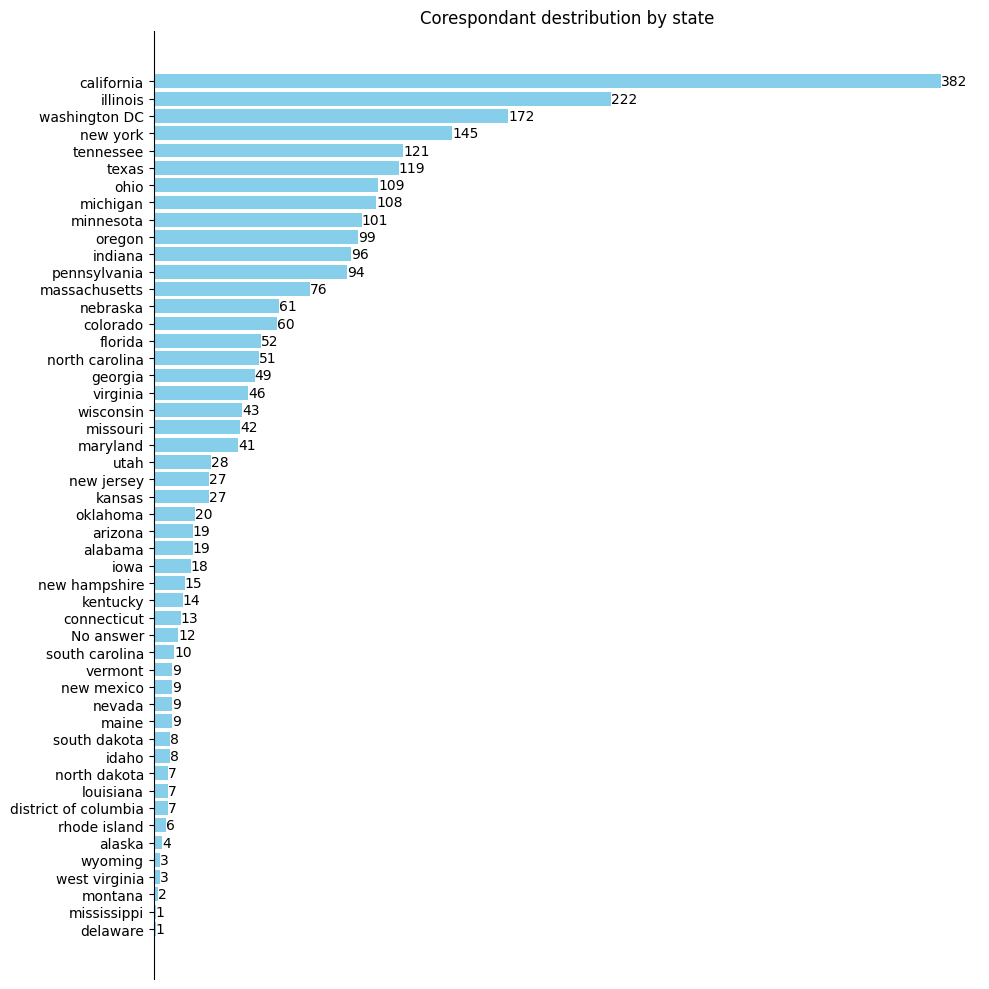

In [20]:
usa_state_of_resedancy_query= q.usa_state_of_resedancy_query()

plt.figure(figsize=(10, 10))
bars = plt.barh(usa_state_of_resedancy_query['CleanedAnswer'], usa_state_of_resedancy_query['Count'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center')

plt.title('Corespondant destribution by state')
plt.xlabel('')
plt.ylabel('')
plt.gca().invert_yaxis()
sns.despine()
plt.gca().xaxis.set_ticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

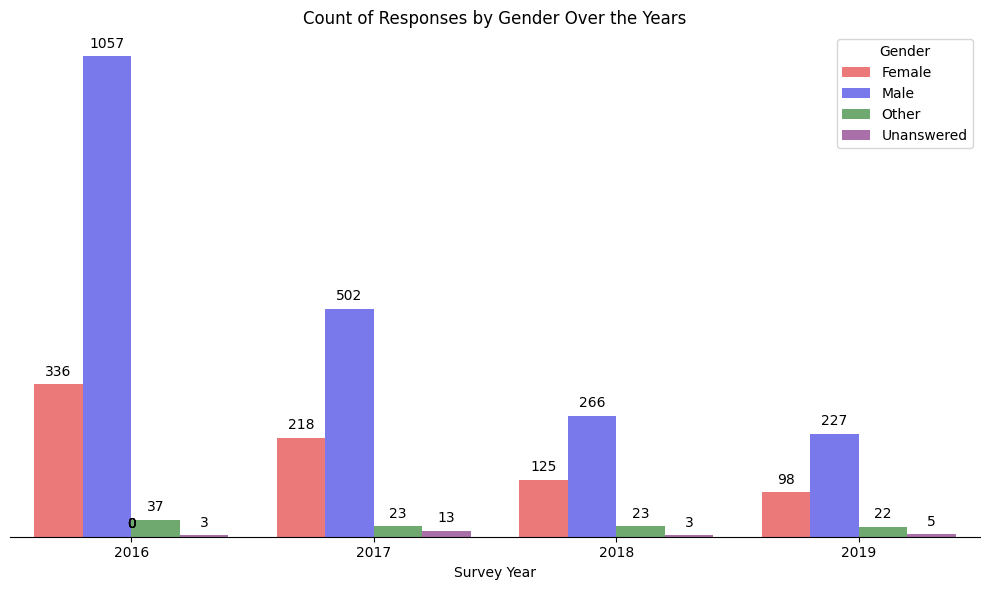

In [21]:
avg_age_by_gender = q.get_gender_distribution()

custom_palette = {'Female': 'red', 'Male': 'blue', 'Other': 'green', 'Unanswered': 'purple'}

filtered_avg_age_by_gender = avg_age_by_gender[avg_age_by_gender['SurveyID'] != 2014]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=filtered_avg_age_by_gender, x='SurveyID', y='Count', hue='GenderGroup', palette=custom_palette, alpha=0.6, dodge=True)

plt.title('Count of Responses by Gender Over the Years')
plt.xlabel('Survey Year')
plt.ylabel('')
plt.legend(title='Gender', loc='upper right')
sns.despine()
plt.gca().yaxis.set_ticks([])
plt.gca().spines['left'].set_visible(False)
plt.grid(False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

From these graphs, we can get quite a few insights. Mainly, we can notice four things: most of the respondents are from the USA, most of the respondents belong in the age group 18-39, the majority of people who did the survey are male, and the survey was done across the whole of America, which means in the dataset there is decent representation of all regions of the USA.

**KEY INSIGHTS:**<br>
* The dataset is mostly representative of the USA and not so much the rest of the world.
* Most of the respondents belong to the 18-39 age category.
* Respondents are predominantly male.
* There is quite a sharp drop in the number of respondents over the years.

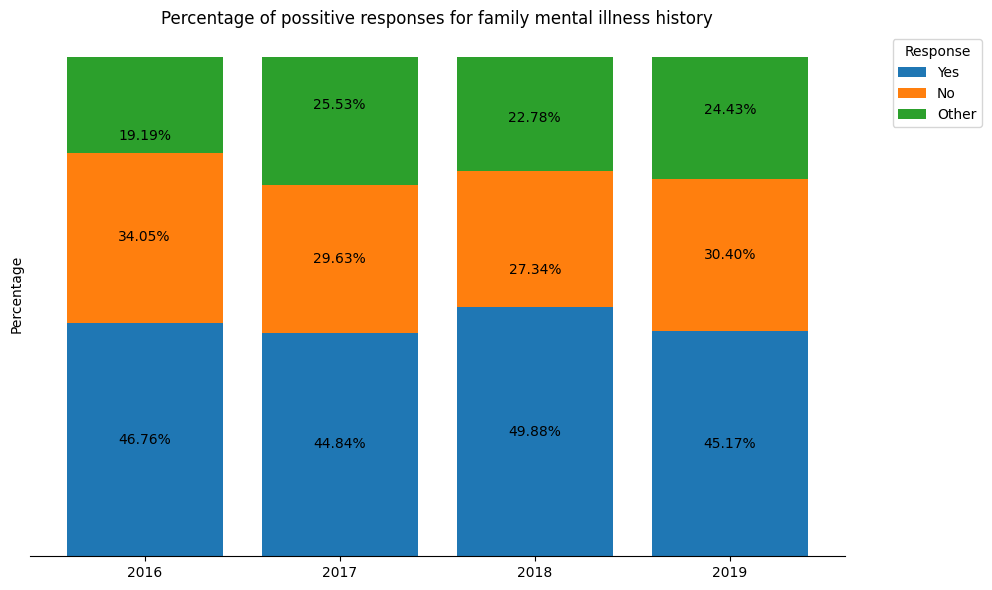

In [28]:
mental_history_df = q.survey_question_yes_no_query(6)
mental_history_df['Yes_Percentage'] = (mental_history_df['Yes_Count'] / mental_history_df['Total_Answers_Q6']) * 100
mental_history_df['No_Percentage'] = (mental_history_df['No_Count'] / mental_history_df['Total_Answers_Q6']) * 100
mental_history_df['Other_Percentage'] = (mental_history_df['Other_Count'] / mental_history_df['Total_Answers_Q6']) * 100

plt.figure(figsize=(10, 6))

plt.bar(mental_history_df['SurveyID'], mental_history_df['Yes_Percentage'], label='Yes')
plt.bar(mental_history_df['SurveyID'], mental_history_df['No_Percentage'], bottom=mental_history_df['Yes_Percentage'], label='No')
plt.bar(mental_history_df['SurveyID'], mental_history_df['Other_Percentage'], bottom=mental_history_df['Yes_Percentage'] + mental_history_df['No_Percentage'], label='Other')

plt.title('Percentage Of Possitive Responses For Family Mental Illness History')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title='Response',bbox_to_anchor=(1.05, 1), loc='upper left')

for i, value in enumerate(mental_history_df['Yes_Percentage']):
    plt.text(mental_history_df['SurveyID'][i], value/2, f'{value:.2f}%', ha='center', va='center')

for i, value in enumerate(mental_history_df['No_Percentage']):
    plt.text(mental_history_df['SurveyID'][i], value+30, f'{value:.2f}%', ha='center', va='center')

for i, value in enumerate(mental_history_df['Other_Percentage']):
    plt.text(mental_history_df['SurveyID'][i], value+65, f'{value:.2f}%', ha='center', va='center')

plt.xticks(mental_history_df['SurveyID'])

plt.grid(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().yaxis.set_ticks([])
plt.tight_layout()
plt.show()

There doesn't seem to be any significant changes in the percentage of people that respond positively to the question asking about family mental illness history. Also, it's quite obvious that in America mental illness is quite a common occurrence (>45%).

In [23]:
#Argument taken by function survey_question_yes_no_query() is questionID. Check utilities->questions.csv for further information.
treated_df=q.survey_question_yes_no_query(7)
openess_during_jobhunt_df=q.survey_question_yes_no_query(12)
openess_with_coworker_df=q.survey_question_yes_no_query(18)
openess_with_superior_df=q.survey_question_yes_no_query(19)
openess_with_client_df=q.survey_question_yes_no_query(53)
past_ilness_df=q.survey_question_yes_no_query(32)
current_ilness_df=q.survey_question_yes_no_query(33)
ever_ilness_df=q.survey_question_yes_no_query(34)
treated_df['Yes_Percentage'] = (treated_df['Yes_Count'] / treated_df['Total_Answers_Q7']) * 100
openess_during_jobhunt_df['Yes_Percentage'] = (openess_during_jobhunt_df['Yes_Count'] / openess_during_jobhunt_df['Total_Answers_Q12']) * 100
openess_with_coworker_df['Yes_Percentage'] = (openess_with_coworker_df['Yes_Count'] / openess_with_coworker_df['Total_Answers_Q18']) * 100
openess_with_superior_df['Yes_Percentage'] = (openess_with_superior_df['Yes_Count'] / openess_with_superior_df['Total_Answers_Q19']) * 100
openess_with_client_df['Yes_Percentage'] = (openess_with_client_df['Yes_Count'] / openess_with_client_df['Total_Answers_Q53']) * 100
past_ilness_df['Yes_Percentage'] = (past_ilness_df['Yes_Count'] / past_ilness_df['Total_Answers_Q32']) * 100
current_ilness_df['Yes_Percentage'] = (current_ilness_df['Yes_Count'] / current_ilness_df['Total_Answers_Q33']) * 100
ever_ilness_df['Yes_Percentage'] = (ever_ilness_df['Yes_Count'] / ever_ilness_df['Total_Answers_Q34']) * 100



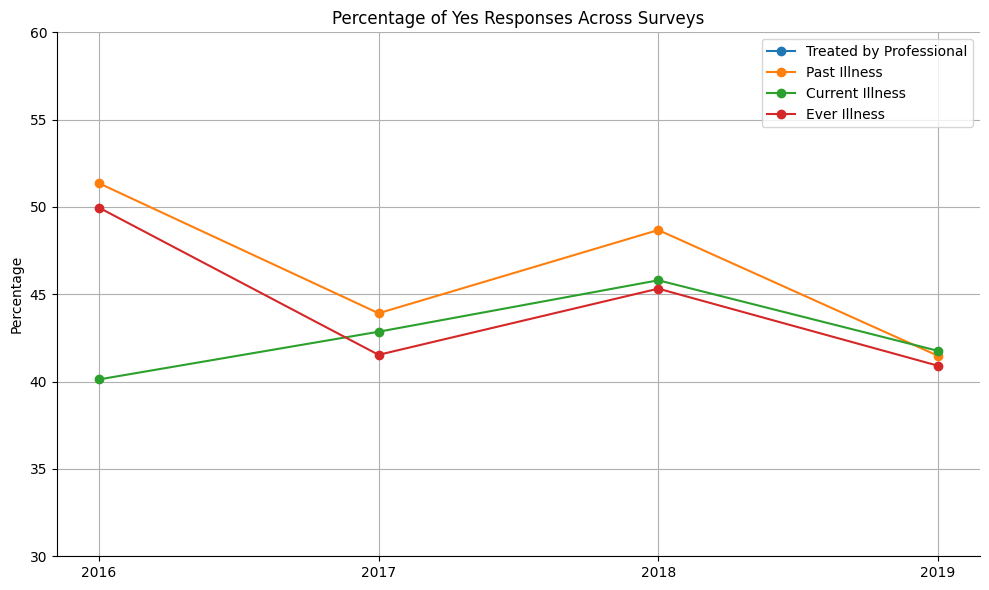

In [24]:
plt.figure(figsize=(10, 6))

plt.plot(treated_df['SurveyID'], treated_df['Yes_Percentage'], label='Treated by Professional', marker='o')
plt.plot(past_ilness_df['SurveyID'], past_ilness_df['Yes_Percentage'], label='Past Illness', marker='o')
plt.plot(current_ilness_df['SurveyID'], current_ilness_df['Yes_Percentage'], label='Current Illness', marker='o')
plt.plot(ever_ilness_df['SurveyID'], ever_ilness_df['Yes_Percentage'], label='Ever Illness', marker='o')

plt.title('Percentage of Yes Responses Across Surveys')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.grid(True)
sns.despine()
plt.xticks(ever_ilness_df['SurveyID'])
plt.tight_layout()

plt.ylim(30, 60)

plt.show()


**KEY INSIGHT:**<br>
The percentage of respondents with mental illness at any stage in their life is very similar to the percentage of people that have family members with mental illness. It may be a strong indication considering the percentage of mentally ill Americans.

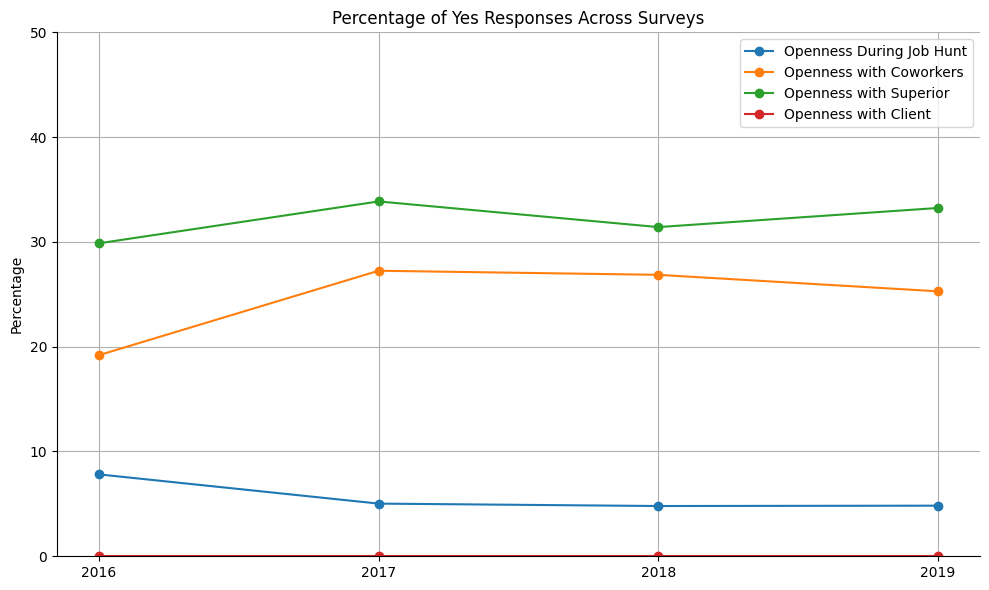

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(openess_during_jobhunt_df['SurveyID'], openess_during_jobhunt_df['Yes_Percentage'], label='Openness During Job Hunt', marker='o')
plt.plot(openess_with_coworker_df['SurveyID'], openess_with_coworker_df['Yes_Percentage'], label='Openness with Coworkers', marker='o')
plt.plot(openess_with_superior_df['SurveyID'], openess_with_superior_df['Yes_Percentage'], label='Openness with Superior', marker='o')
plt.plot(openess_with_client_df['SurveyID'], openess_with_client_df['Yes_Percentage'], label='Openness with Client', marker='o')

plt.title('Percentage of Yes Responses Across Surveys')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.grid(True)
sns.despine()
plt.xticks(openess_with_client_df['SurveyID'])
plt.tight_layout()
plt.ylim(0, 50)

plt.show()


**KEY INSIGHTS:**<br>
* People are least likely to open up to clients, a bit more likely to open up during job hunt, and around 1/3rd of respondents are open with their coworkers and superiors.

In [ ]:
dbu.close_connection(conn)

## <center>Conclusion<center>

1. Survey respondents are predominantly male and living in the US, which implies that this dataset may not be the best representation of people worldwide.<br>
2. There is a sharp decline in the number of people responding over the years, but percentages considering ill people or having ill family members are pretty consistent. This is a strong indicator that in the USA around 40% of the population has some kind of mental illness.<br>
3. Considering these facts: respondent count sharply declines while openness slightly rises and overall ill people modestly decline. All these things together may be the basis for a theory that there was a boom considering mental health awareness, which made people a bit more open about their mental health and encouraged them to seek help (overall ill people percentage drop). But considering the fact that it's quite a small dataset, nothing can be said definitively.<br>

So is there a trend indicating increased openness in sharing about personal mental health disorders? Judging by the information we have so far, it's hard to tell definitively, but it doesn't seem so.

## <center>Future works<center>

This EDA can be improved in quite few ways. Some of them are :<br>
* In-depth manual categorization of answers.
* Normalization of columns would allow to check for correlations.
* Comparisons with past employees.
* Analysis on how much attention people spend on their mental health.
* Individual survey analysis might provide insight into sharp respondent decline.
* Looking into territories with the sharpest decline of respondents that are open to share their mental health problems might give some indications about the sociopolitical shift going on in the region.
* Looking for the same person in several surveys may provide some insight into people's thoughts shifting.